In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a
x = np.arange(-10., 10., 0.2)
plt.grid()

<center>
<h2>Neural Networks</h2>
<p style="text-align:center">
Natural Language Processing<br>
(COM4513/6513)<br>
<br>
<a href="http://andreasvlachos.github.io">Andreas Vlachos</a><br>
a.vlachos@sheffield.ac.uk<br>
<small>Department of Computer Science<br>
University of Sheffield
</small>
</p>
</center>

### In this lecture

Neural networks:
- a learning paradigm that is driving a lot of the recent progress in the field
- comes with many names: deep learning, representation learning, etc.

Have we seen any so far?

### Skip-gram

<img src="images/skipgram.png"  style="width:950px;">

Given the word in the middle predict each of the context words through their embeddings

<h3>Perceptron reminder</h3>
<a href="https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/"><img src="images/perceptron.png" style="width:600px; background:none; border:none; box-shadow:none;" /></a>

$$\hat y = sign(\sum_{n=1}^N w_nx_n) = sign(\mathbf{w} \cdot \mathbf{x})$$

<h3>Logistic regression reminder</h3>

<p>Logistic regression (binary):
$$P(y=1| \mathbf{x};\mathbf{w}) = \sigma(\mathbf{w} \cdot \mathbf{x}) =  \frac{1}{1+\exp( - \mathbf{w} \cdot \mathbf{x})} $$
</p>

The most basic neural network:
- an input layer, $\mathbf{x}$
- (learned) weights $\mathbf{w}$ (includes $bias$)
- activation function, sigmoid $\sigma$

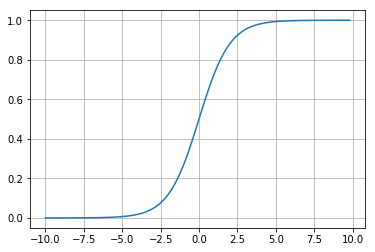

In [9]:
plt.plot(x,sigmoid(x))
plt.show()

### Limitations of linear models

Linear classifiers are useful in a variety of tasks.

But what are their limitations?

<img src="images/linearlySep.jpg" style="width:400px; float:left" />
<img src="images/nonLinearlySep.jpg" style="width:400px; float:right" />

The righthand dataset is not linearly separable and cannot be learned with a linear model.

### Intuition

<img src="images/nonLinearlySep.jpg"/>

Decompose the problem in 3 binary tasks:
- top-right red circles vs. rest
- bottom-left red circles vs. rest
- the actual task using the above as input

### Multilayer perceptron

with one hidden layer consisting of two units (neurons):
				
<img src="images/hiddenLayerNN.jpg" style="width:650px;" />

\begin{align}
h_1(\mathbf{x},\theta_1,\theta_2, b_1) & = \sigma(\theta_1 x_1 + \theta_2 x_2 + b_1 )\\
h_2(\mathbf{x},\theta_3,\theta_4, b_2) & = \sigma(\theta_3 x_1 + \theta_4 x_2 + b_2 )\\
f(\mathbf{x},\pmb{\theta}, \mathbf{b}, \pmb{\omega}, c) & = \sigma(\omega_1 h_1(\mathbf{x},\mathbf{\theta}, b_1) + \omega_2 h_2(\mathbf{x},\mathbf{\theta}, b_2) + c )\\
\end{align}

$h_1$ and $h_2$ are the input (**learned features**) for the final (classification) layer

### Training

What $\mathbf{w}=\{\pmb{\theta}, \pmb{\omega}, \mathbf{b}, c\}$ best fits $D_{train} = \{(x_1,y_1)... (x_N, y_N)\}$?

The $\mathbf{w}^{\star} \in \cal \Re^d$ ($d=$ number of features) maximizing log-likelihood:

$$\mathbf{w}^{\star} = \mathop{\arg \max}\limits_{\mathbf{w}} L(\mathbf{w};D_{train}) = \mathop{\arg \max}\limits_{\mathbf{w}} \sum_{n=1}^N \log f(y_n|x_n;\mathbf{w})$$

Not enough to avoid mistakes, make them unlikely!

Sounds familiar?

### Gradient-based optimization

<a href="http://bestmaths.net/online/index.php/year-levels/year-12/year-12-topic-list/first-principles/"><img src="images/Y12_Differentiation_from_First_Principles_02.gif"></a>

$f(x)=x^2$

$\nabla_x f(x) = 2x$

$f(x)$ is convex, thus if $\nabla_x f(x_k) = 0$ then $x_k = \mathop{\arg \max}\limits_{x \in \Re} f(x)$

### Gradient descent
<p style="border:3px; width:1000px; border-radius: 25px; background-color:lightgrey; border-style:solid; border-color:black; padding: 0.3em;">
\begin{align}
& \textbf{Input:} \; D_{train} = \{(x_1,y_1)...(x_N,y_N)\}, learning \; rate\; \alpha\\
& initialize\; \mathbf{w} \\
& \mathbf{while} \; not \; converged \; \mathbf{do}\\
& \quad update \; \mathbf{w} = \mathbf{w} - \alpha \nabla_{\mathbf{w}} NLL(\mathbf{w};D_{train}) \\
& \mathbf{return} \; \mathbf{w}
\end{align}
</p>

- minimizing the negative log likelihood ($NLL$) = maximize the likelihood
- learning rate shouldn't be too big; more advanced methods adapt it

### Training

<img src="images/hiddenLayerNN.jpg" style="width:450px; background:none; border:none; box-shadow:none;" />

How to learn:
- $\mathbf{\theta}$ if we do not know what their outputs $h_1, h_2$ should be?
- $\mathbf{\omega}$  if we do not know the inputs $h_1, h_2$?

**Backpropagation**: in every SGD iteration:
- model calculates intermediate and final values (forward step)
- use them to calculate the gradients (back-propagate)

### Backpropagation

<p style="border:3px; width: 900px; border-radius: 25px; background-color:lightgrey; border-style:solid; border-color:black; padding: 0.3em;">
\begin{align}
& \textbf{Input:} \; D_{train} = \{(\mathbf{x}^1,y^1)...(\mathbf{x}^M,y^M)\}\\
& initialize\; randomly \; \mathbf{\theta}, \mathbf{\omega}, \mathbf{b}, c  \\
& \mathbf{for} \; (\mathbf{x},y) \in D_{train} \; \mathbf{do}\\
& \quad predict  \; \hat y, hidden_1, hidden_2 = f(\mathbf{x},\mathbf{\theta}, \mathbf{b}, \omega_1, \omega_2, c) \\
& \quad calculate \; loss \; l=L(\hat y, y)\\
& \quad backpropagate\; l \; via\; gradients: update \; \mathbf{\omega}, c; update \; \mathbf{\theta},\mathbf{\beta}\\
& \mathbf{return} \; w
\end{align}
</p>

### Non-linearity

<!--TODO: explain via linear function, anything that is not y=ax+b-->
...matters. Without a non-linear activation function  hidden layers are not helpful.

[Let's play](http://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.24754&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification)

### Implementation tips

- Learning objective non-convex: initialization matters
- start with small non-zero values
- random restarts to escape local optima

- greater learning capacity makes overfitting more likely: regularize

- check gradient implementation using numeric differentiation

- many software toolkits are available to use: Tensorflow, Theano, Torch etc

### A bit of history

XOR and AI winter

Kernel methods (SVMs) in the 90's and early 00's overtook NNs in popularity for two reasons:
- theoretical guarantees
- computers were not powerful enough

Empirical success and faster computers changed this.

A personal note : when I was an MSc student, I was told that NNs	belonged to the past...

### Bibliography

- A [simple implementation](http://iamtrask.github.io/2015/07/12/basic-python-network/) in python of backpropagation for a multilayer perceptron
- A [presentation](http://lxmls.it.pt/2016/Deep-Neural-Networks-Are-Our-Friends.pdf) by Wang Ling explaining it differently as a computation graph 
- The lecture followed the [tutorial](http://cs.stanford.edu/~quocle/tutorial1.pdf) of Quoc V. Le
- A nice, full-fledged explanation of [back-propagation](http://cs231n.github.io/optimization-2/)
- Similar material from an NLP perspective is covered in Yoav Goldberg's [tutorial](http://u.cs.biu.ac.il/~yogo/nnlp.pdf), sections 3-6
- Chapter 6, 7 and 8 from the just released [deep learning book](http://www.deeplearningbook.org)

### Coming up next

The most common neural network architecture in NLP:

Recurrent neural networks